In [158]:
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yahooFinance
import plotly.express as px
import numpy as np

In [159]:
info_DJI = yahooFinance.Ticker("^DJI")

data=info_DJI.history(period="7d", interval="1m")
#data=info_DJI.history(start="2022-06-27", end="2022-06-28", interval="1m")
data.drop(["Volume","Dividends","Stock Splits"],inplace=True,axis=1)
data

,Open,High,Low,Close
Datetime,,,,
2022-06-21 09:30:00-04:00,30074.689453,30331.300781,30074.689453,30293.720703
2022-06-21 09:31:00-04:00,30291.929688,30322.580078,30277.490234,30321.980469
2022-06-21 09:32:00-04:00,30321.169922,30327.630859,30303.699219,30304.679688
2022-06-21 09:33:00-04:00,30310.410156,30320.419922,30304.439453,30316.660156
2022-06-21 09:34:00-04:00,30318.689453,30325.699219,30283.070312,30300.550781
...,...,...,...,...
2022-06-29 15:56:00-04:00,31030.099609,31038.529297,31027.859375,31030.919922
2022-06-29 15:57:00-04:00,31031.109375,31058.929688,31031.109375,31058.929688
2022-06-29 15:58:00-04:00,31060.519531,31065.820312,31059.589844,31059.859375


In [160]:
data["9EMA"]=data[["Close"]].ewm(alpha=0.2).mean()     
f=2/22                                              #this is 2/(21+1)
print(f)
data["21EMA"]=data[["Close"]].ewm(alpha=f).mean()
# finding crossovers
data["prev_9EMA"] = data["9EMA"].shift(1)
data["prev_21EMA"] = data["21EMA"].shift(1)
data["slope_9EMA"] = data["9EMA"]-data["prev_9EMA"]
data["slope_21EMA"] = data["21EMA"]-data["prev_21EMA"]
data["slope_btwEMA"] = (data["slope_9EMA"]-data["slope_21EMA"])/(1+data["slope_9EMA"]*data["slope_21EMA"])
data

0.09090909090909091


,Open,High,Low,Close,9EMA,21EMA,prev_9EMA,prev_21EMA,slope_9EMA,slope_21EMA,slope_btwEMA
Datetime,,,,,,,,,,,
2022-06-21 09:30:00-04:00,30074.689453,30331.300781,30074.689453,30293.720703,30293.720703,30293.720703,NaN,NaN,NaN,NaN,NaN
2022-06-21 09:31:00-04:00,30291.929688,30322.580078,30277.490234,30321.980469,30309.420573,30308.523438,30293.720703,30293.720703,15.699870,14.802734,0.003844
2022-06-21 09:32:00-04:00,30321.169922,30327.630859,30303.699219,30304.679688,30307.477587,30307.118320,30309.420573,30308.523438,-1.942986,-1.405117,-0.144196
2022-06-21 09:33:00-04:00,30310.410156,30320.419922,30304.439453,30316.660156,30310.588213,30309.854839,30307.477587,30307.118320,3.110626,2.736519,0.039329
2022-06-21 09:34:00-04:00,30318.689453,30325.699219,30283.070312,30300.550781,30307.602304,30307.623578,30310.588213,30309.854839,-2.985909,-2.231261,-0.098488
...,...,...,...,...,...,...,...,...,...,...,...
2022-06-29 15:56:00-04:00,31030.099609,31038.529297,31027.859375,31030.919922,31009.429733,31011.836657,31004.057186,31009.928330,5.372547,1.908327,0.307860
2022-06-29 15:57:00-04:00,31031.109375,31058.929688,31031.109375,31058.929688,31019.329724,31016.117841,31009.429733,31011.836657,9.899991,4.281185,0.129514
2022-06-29 15:58:00-04:00,31060.519531,31065.820312,31059.589844,31059.859375,31027.435654,31020.094344,31019.329724,31016.117841,8.105930,3.976503,0.124256


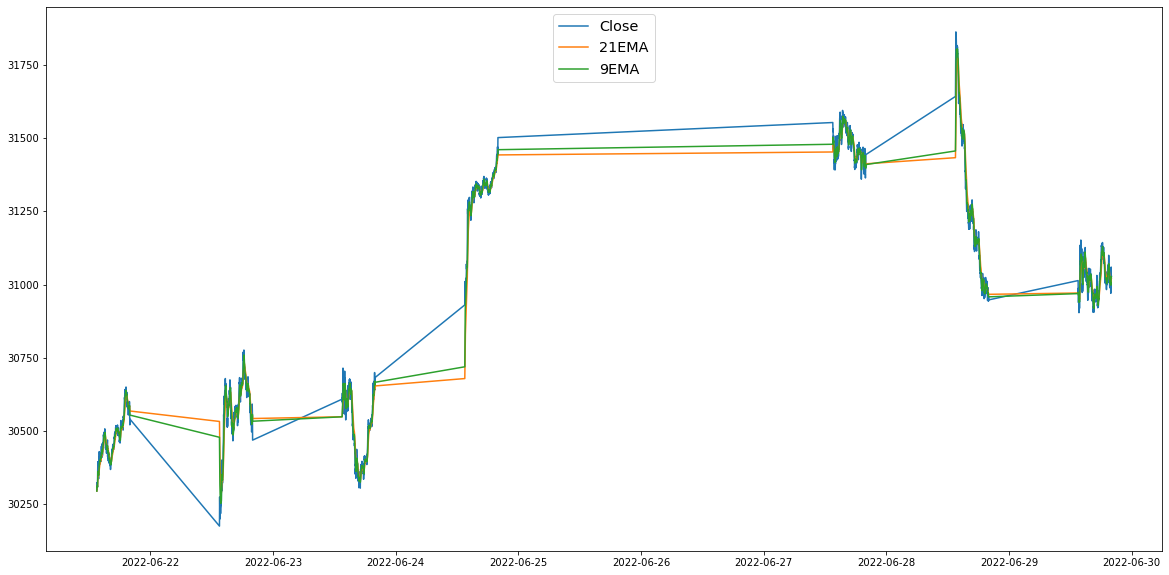

In [161]:
#see our data
plt.figure(figsize=(20,10))

plt.plot(data["Close"],label="Close")
plt.plot(data["21EMA"],label="21EMA")
plt.plot(data["9EMA"],label="9EMA")

plt.legend(loc='upper center',fontsize="x-large")

In [162]:
def find_crossover(fast_sma, prev_fast_sma, slow_sma):      
    
    if fast_sma > slow_sma and prev_fast_sma < slow_sma:
        return 'bullish crossover'
    elif fast_sma < slow_sma and prev_fast_sma > slow_sma:
        return 'bearish crossover'
    
    return None


data['crossover'] = np.vectorize(find_crossover)(data["9EMA"], data["prev_9EMA"], data["21EMA"])

In [163]:
#see data for bullish crosovers
signal = data[data['crossover'] == 'bullish crossover'].copy()
signal

,Open,High,Low,Close,9EMA,21EMA,prev_9EMA,prev_21EMA,slope_9EMA,slope_21EMA,slope_btwEMA,crossover
Datetime,,,,,,,,,,,,
2022-06-21 09:31:00-04:00,30291.929688,30322.580078,30277.490234,30321.980469,30309.420573,30308.523438,30293.720703,30293.720703,15.699870,14.802734,0.003844,bullish crossover
2022-06-21 09:33:00-04:00,30310.410156,30320.419922,30304.439453,30316.660156,30310.588213,30309.854839,30307.477587,30307.118320,3.110626,2.736519,0.039329,bullish crossover
2022-06-21 09:35:00-04:00,30299.750000,30308.109375,30272.939453,30308.109375,30307.739749,30307.724981,30307.602304,30307.623578,0.137444,0.101402,0.035547,bullish crossover
2022-06-21 09:37:00-04:00,30305.349609,30320.710938,30299.779297,30312.150391,30308.215152,30308.010359,30306.970272,30307.159973,1.244880,0.850385,0.191630,bullish crossover
2022-06-21 09:39:00-04:00,30304.320312,30341.019531,30304.320312,30330.990234,30313.154195,30311.314801,30308.003928,30307.898348,5.150267,3.416453,0.093238,bullish crossover
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-29 14:29:00-04:00,31125.410156,31130.880859,31124.349609,31127.570312,31110.000563,31107.473771,31105.608126,31105.464116,4.392437,2.009654,0.242466,bullish crossover
2022-06-29 15:16:00-04:00,31016.740234,31042.009766,31016.570312,31034.099609,31019.651700,31018.970778,31016.039723,31017.457895,3.611977,1.512883,0.324711,bullish crossover
2022-06-29 15:17:00-04:00,31034.220703,31063.099609,31033.589844,31063.099609,31028.341282,31022.982490,31019.651700,31018.970778,8.689582,4.011712,0.130448,bullish crossover


In [164]:
#see data for bearish crosovers
signal1 = data[data['crossover'] == 'bearish crossover'].copy()
signal1

,Open,High,Low,Close,9EMA,21EMA,prev_9EMA,prev_21EMA,slope_9EMA,slope_21EMA,slope_btwEMA,crossover
Datetime,,,,,,,,,,,,
2022-06-21 09:34:00-04:00,30318.689453,30325.699219,30283.070312,30300.550781,30307.602304,30307.623578,30310.588213,30309.854839,-2.985909,-2.231261,-0.098488,bearish crossover
2022-06-21 09:36:00-04:00,30307.630859,30322.320312,30304.660156,30304.699219,30306.970272,30307.159973,30307.739749,30307.724981,-0.769477,-0.565007,-0.142511,bearish crossover
2022-06-21 11:11:00-04:00,30474.619141,30476.769531,30455.830078,30456.169922,30480.810334,30480.843231,30486.970437,30483.310724,-6.160103,-2.467494,-0.227939,bearish crossover
2022-06-21 11:12:00-04:00,30456.369141,30456.369141,30441.369141,30441.369141,30472.922095,30477.254481,30480.810334,30480.843231,-7.888239,-3.588749,-0.146696,bearish crossover
2022-06-21 11:36:00-04:00,30468.269531,30468.880859,30428.419922,30428.859375,30445.186612,30446.391231,30449.268422,30448.144427,-4.081809,-1.753196,-0.285502,bearish crossover
...,...,...,...,...,...,...,...,...,...,...,...,...
2022-06-29 14:32:00-04:00,31108.890625,31109.279297,31094.179688,31096.240234,31106.147273,31106.223874,31108.624032,31107.222237,-2.476760,-0.998364,-0.425718,bearish crossover
2022-06-29 14:33:00-04:00,31096.279297,31101.439453,31086.990234,31094.789062,31103.875631,31105.184345,31106.147273,31106.223874,-2.271642,-1.039528,-0.366544,bearish crossover
2022-06-29 14:35:00-04:00,31096.339844,31097.179688,31076.980469,31076.980469,31097.158060,31101.820804,31102.202458,31104.304838,-5.044398,-2.484034,-0.189230,bearish crossover


In [165]:
# visualize where bullish crossover trend is there

fig = px.line(data, x=data.index, y=["Close","9EMA","21EMA"])

for i, row in signal.iterrows():
    #print(i)
    fig.add_vline(x=i,line_color="lightcoral")
fig.show()

In [166]:
# visualize where bearish crossover trend is there

fig = px.line(data, x=data.index, y=["Close","9EMA","21EMA"])

for i, row in signal1.iterrows():
    #print(i)
    fig.add_vline(x=i,line_color="lime")
fig.show()

In [167]:
# creating buying and selling positions

class Position:
    def __init__(self, open_datetime, open_price, order_type, volume, sl, tp,open_slope):
        self.open_datetime = open_datetime
        self.open_price = open_price
        self.order_type = order_type
        self.volume = volume
        self.sl = sl
        self.tp = tp
        self.close_datetime = None
        self.close_price = None
        self.profit = None
        self.status = 'open'
        self.close_slope=None
        self.open_slope=open_slope
        
    def close_position(self, close_datetime, close_price,close_slope):
        self.close_datetime = close_datetime
        self.close_slope=close_slope
        self.close_price = close_price
        self.profit = (self.close_price - self.open_price) * self.volume if self.order_type == 'buy' \
                                                                        else (self.open_price - self.close_price) * self.volume
        self.status = 'closed'
        
    def _asdict(self):
        return {
            'open_datetime': self.open_datetime,
            'open_price': self.open_price,
            'order_type': self.order_type,
            'volume': self.volume,
            'sl': self.sl,
            'tp': self.tp,
            'close_datetime': self.close_datetime,
            'close_price': self.close_price,
            'profit': self.profit,
            'close_slope': self.close_slope,
            'open_slope': self.open_slope,
            'status': self.status,
        }

class Strategy:
    def __init__(self, df, starting_balance, volume):
        self.starting_balance = starting_balance
        self.volume = volume
        self.positions = []
        self.data = df
        
    def get_positions_df(self):
        df = pd.DataFrame([position._asdict() for position in self.positions])
        df['pnl'] = df['profit'].cumsum() + self.starting_balance
        return df
        
    def add_position(self, position):
        self.positions.append(position)
        
        return True
        
# logic
    def run(self):
        for i, data in self.data.iterrows():
            
            if data.crossover == 'bearish crossover':
                for position in self.positions:
                    if position.status == 'open':
                        position.close_position(i, data.Close,data.slope_btwEMA)
                        
            
            if data.crossover == 'bullish crossover':
                self.add_position(Position(i, data.Close, 'buy', self.volume, 0, 0,data.slope_btwEMA))
        
        return self.get_positions_df()

In [168]:
#Without taking slopes of EMA into account
sma_crossover_strategy = Strategy(data, 10000, 1)        #10000 is taken as initial balance. 1 is the volume of stock to be traded at a time.
result = sma_crossover_strategy.run()
result.dropna(inplace=True)          #dropped the rows having NaN/msissing values
result

,open_datetime,open_price,order_type,volume,sl,tp,close_datetime,close_price,profit,close_slope,open_slope,status,pnl
0,2022-06-21 09:31:00-04:00,30321.980469,buy,1,0,0,2022-06-21 09:34:00-04:00,30300.550781,-21.429688,-0.098488,0.003844,closed,9978.570312
1,2022-06-21 09:33:00-04:00,30316.660156,buy,1,0,0,2022-06-21 09:34:00-04:00,30300.550781,-16.109375,-0.098488,0.039329,closed,9962.460938
2,2022-06-21 09:35:00-04:00,30308.109375,buy,1,0,0,2022-06-21 09:36:00-04:00,30304.699219,-3.410156,-0.142511,0.035547,closed,9959.050781
3,2022-06-21 09:37:00-04:00,30312.150391,buy,1,0,0,2022-06-21 11:11:00-04:00,30456.169922,144.019531,-0.227939,0.191630,closed,10103.070312
4,2022-06-21 09:39:00-04:00,30330.990234,buy,1,0,0,2022-06-21 11:11:00-04:00,30456.169922,125.179688,-0.227939,0.093238,closed,10228.250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
120,2022-06-29 13:30:00-04:00,30978.259766,buy,1,0,0,2022-06-29 14:24:00-04:00,31086.050781,107.791016,-0.251191,0.182073,closed,10407.248047
121,2022-06-29 14:28:00-04:00,31125.279297,buy,1,0,0,2022-06-29 14:32:00-04:00,31096.240234,-29.039062,-0.425718,0.273277,closed,10378.208984
122,2022-06-29 14:29:00-04:00,31127.570312,buy,1,0,0,2022-06-29 14:32:00-04:00,31096.240234,-31.330078,-0.425718,0.242466,closed,10346.878906
123,2022-06-29 15:16:00-04:00,31034.099609,buy,1,0,0,2022-06-29 15:35:00-04:00,31026.410156,-7.689453,-0.241762,0.324711,closed,10339.189453


In [169]:
profit_values=np.array([])
for thre_slope in np.arange(0.01,0.40,0.005):
    count=0              #no. of buy-sell done. 
    p=0.0                #profit for each thre_slope
    print("For threshold slope: ",thre_slope)
    for i,row in result.iterrows():
        if row["open_slope"]>thre_slope:
            if row["close_slope"]< -1*thre_slope:
                count+=1
                p+=row["profit"]
    print("Profit= ",p,"\nNo. of buy-sell actions= ",count,"\n")
    profit_values=np.append(profit_values,p)
print(profit_values)

For threshold slope:  0.01
Profit=  323.9296875 
No. of buy-sell actions=  124 

For threshold slope:  0.015
Profit=  323.9296875 
No. of buy-sell actions=  124 

For threshold slope:  0.019999999999999997
Profit=  323.9296875 
No. of buy-sell actions=  124 

For threshold slope:  0.024999999999999998
Profit=  -35.2890625 
No. of buy-sell actions=  122 

For threshold slope:  0.03
Profit=  -126.068359375 
No. of buy-sell actions=  121 

For threshold slope:  0.034999999999999996
Profit=  -196.0390625 
No. of buy-sell actions=  120 

For threshold slope:  0.039999999999999994
Profit=  -254.798828125 
No. of buy-sell actions=  117 

For threshold slope:  0.045
Profit=  -254.798828125 
No. of buy-sell actions=  117 

For threshold slope:  0.049999999999999996
Profit=  -254.798828125 
No. of buy-sell actions=  117 

For threshold slope:  0.05499999999999999
Profit=  -254.798828125 
No. of buy-sell actions=  117 

For threshold slope:  0.05999999999999999
Profit=  -197.609375 
No. of buy-se

In [170]:
#Averaging over every 3 elements (so as to make sure our data was not skewed)
avg_profit_values=np.average(profit_values.reshape(-1,3),axis=1)
print("average profit values in group of 3: ",avg_profit_values)

max_avg_profit=np.amax(avg_profit_values)
g=np.where(avg_profit_values==np.amax(avg_profit_values)) #Get index of highesst avg value
print("max of average profit= ",max_avg_profit)
#print(g[0])

final_threshold_slope=0.015*(1+g[0])      #Taking middle of the 3 values which we averaged earlier

average profit values in group of 3:  [ 323.9296875  -119.13216146 -254.79882812 -216.67252604 -550.38736979
 -475.47070312 -279.94596354 -104.53190104   26.18424479  169.28776042
  320.07942708  380.80078125  522.51302083  461.78710938  647.17838542
   10.83658854   53.56054688   94.96744792  231.30533854  297.79492188
  257.29817708  230.28515625  244.35742188  251.26822917  214.31380208
  203.828125  ]
max of average profit=  647.1783854166666


In [171]:
print("Ideal Threshold slope for DJI for valid signals= ",final_threshold_slope)

Ideal Threshold slope for DJI for valid signals=  [0.225]


In [174]:
# Finding slope of each EMA ,just applied basic trigonometry m= (y2-y1)/(x2-x1)
# Then for finding slope between the 9EMA and 21 EMA , used the formula m=(m2-m1)/(1+m1*m2) , where m1 and m2 are the 2 slopes
# I named this slope during bullish market as open_slope and during bearish market as close_scope
# Then to find the best threshold slope, I iterated through slopes from 0.01 to 0.40 at an interval of 0.05 , 
# putting a condition that if both open_slope and close_slope has higher magnitude than threshold slope , that profit is taken into account.
# With the array of profits received, I converted it into average of 3 corresponding values in that array so as prevent from an exception causing skew data!
# Then found the corresponding index of the highest average profit, and took it to be middle of the 3 indices initially taken for average